In [53]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
dataset = pd.read_csv('iris.csv')
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
dataset.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
dtype: int64

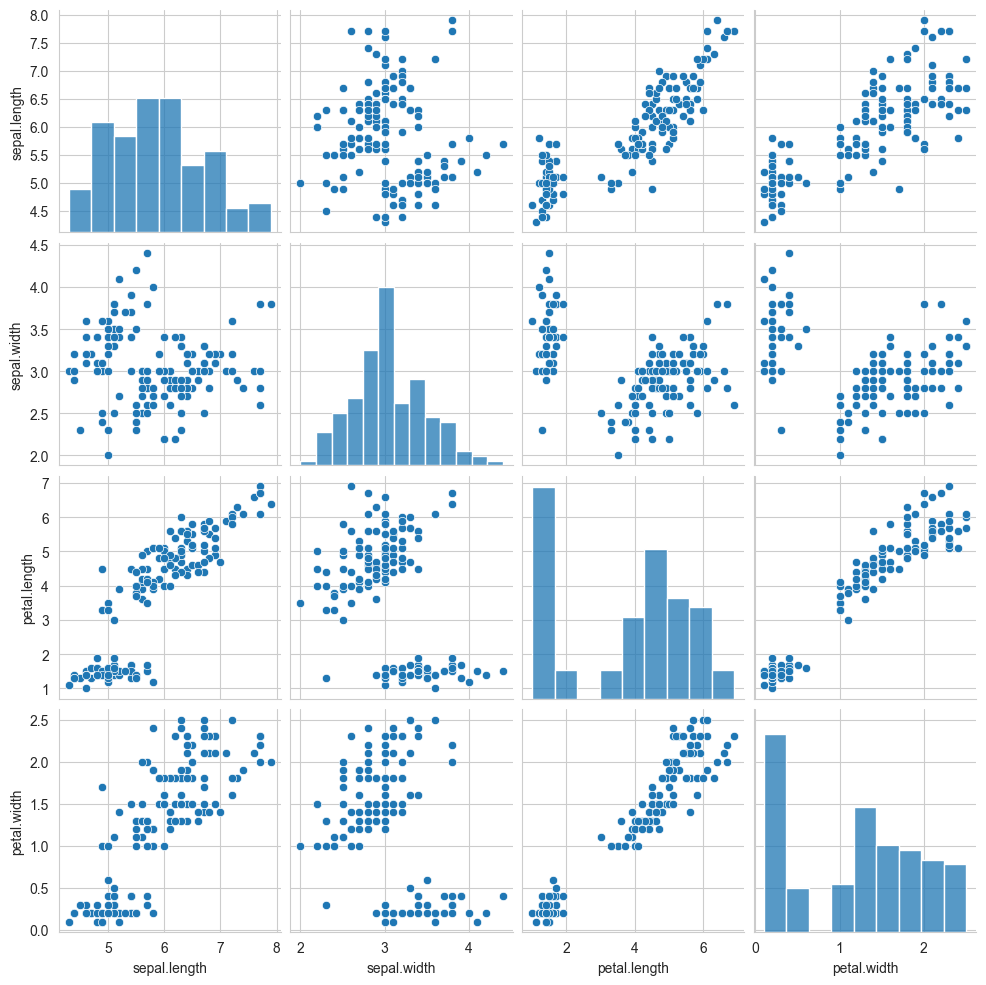

In [56]:
sns.pairplot(data=dataset)
plt.show()

In [57]:
wcss = []

for i in range(2,21):
    km = KMeans(n_init=i,init='k-means++')
    km.fit(dataset)
    wcss.append(km.inertia_)

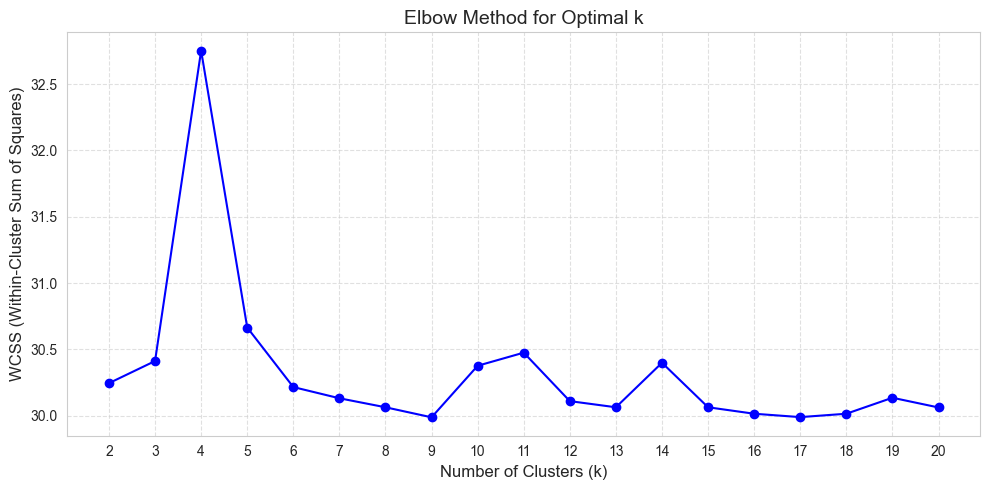

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 21), wcss, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal k", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("WCSS (Within-Cluster Sum of Squares)", fontsize=12)
plt.xticks(range(2, 21))
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [59]:
from sklearn.metrics import silhouette_score


In [60]:
kmn = KMeans(n_clusters=3)
dataset['predict_Output']=kmn.fit_predict(dataset)

In [61]:
silhouette_score(dataset,labels=kmn.labels_)

0.6128676734836785

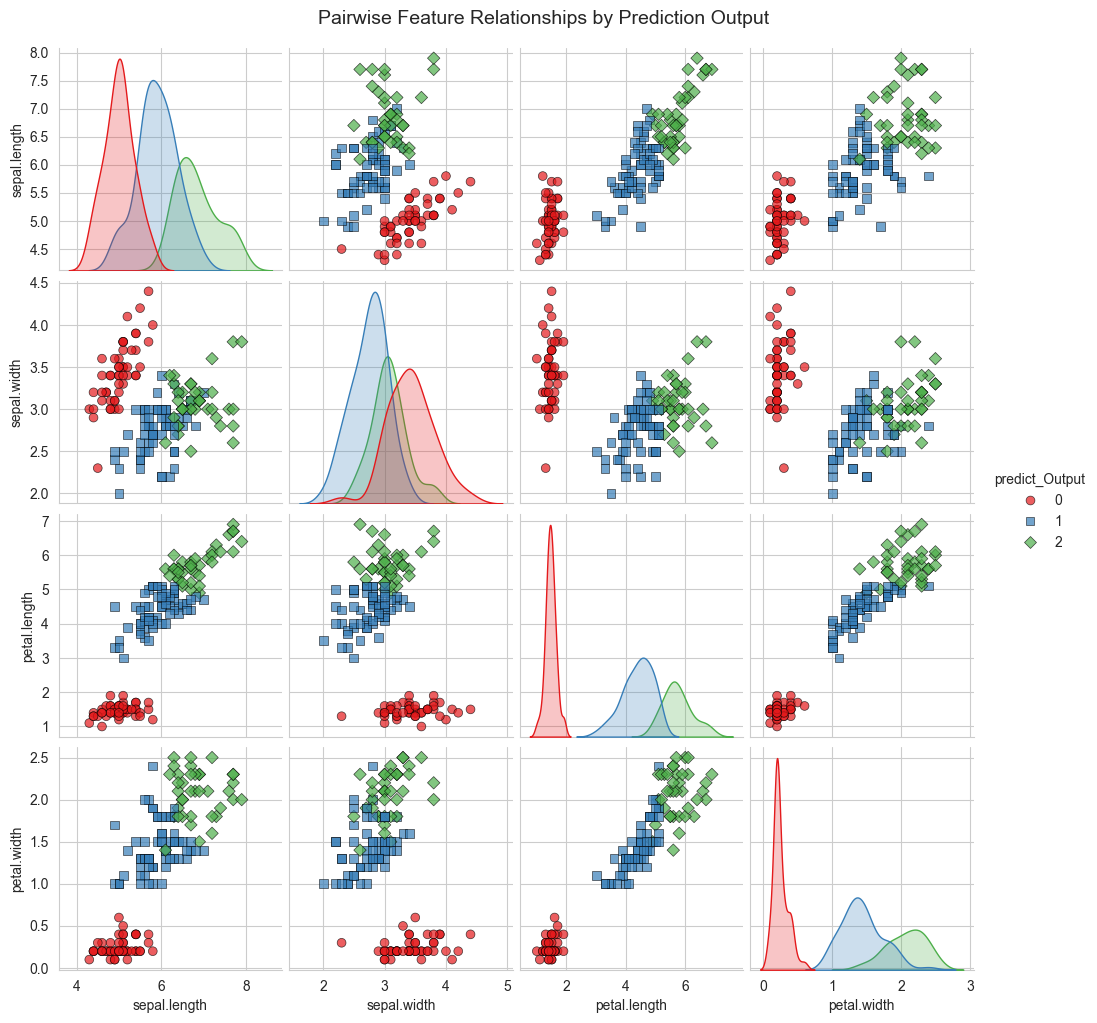

In [62]:

sns.set_style("whitegrid")
sns.pairplot(
    data=dataset,
    hue="predict_Output",
    diag_kind="kde",              
    palette="Set1",            
    markers=["o", "s", "D"],      
    plot_kws={"alpha":0.7, "s":40, "edgecolor":"k"}  
)

plt.suptitle("Pairwise Feature Relationships by Prediction Output", fontsize=14, y=1.02)
plt.show()


In [63]:
ss = []
no_c = [j for j in range(2,21)]
for i in range(2,21):
    km1  = KMeans(n_clusters=i)
    km1.fit(dataset)
    ss.append(silhouette_score(dataset,km1.labels_))

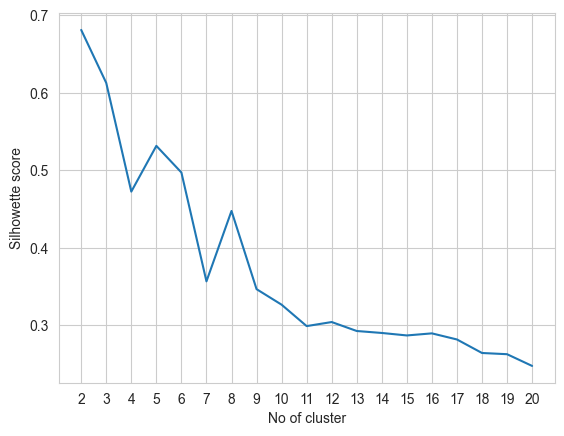

In [64]:
plt.plot(no_c,ss)
plt.xlabel('No of cluster')
plt.ylabel("Silhowette score")
plt.xticks(no_c)
plt.show()